In [1]:
import pandas as pd 
import numpy as np


In [2]:
sales =pd.read_csv('/home/kali/Documents/projects/MentorBI/US+Candy+Distributor/Candy_Sales.csv')
uszips = pd.read_csv('/home/kali/Documents/projects/MentorBI/US+Candy+Distributor/uszips.csv')

In [3]:
sales['Postal Code'] = sales['Postal Code'].apply(lambda x : str(x))
uszips['zip'] = uszips['zip'].apply(lambda x : str(x))


In [4]:

sales_uszips = pd.merge(sales, uszips, how='left', left_on='Postal Code', right_on='zip')


In [5]:
factory = pd.read_csv('US+Candy+Distributor/Candy_Factories.csv')
product = pd.read_csv('US+Candy+Distributor/Candy_Products.csv')

In [6]:
factory.head()

,Factory,Latitude,Longitude
0,Lot's O' Nuts,32.881893,-111.768036
1,Wicked Choccy's,32.076176,-81.088371
2,Sugar Shack,48.119140,-96.181150
3,Secret Factory,41.446333,-90.565487
4,The Other Factory,35.117500,-89.971107


In [7]:
product.head()

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30


In [8]:

from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    # Radius of Earth in kilometers
    R = 6371
    
    # Calculate distance
    distance = R * c
    
    return distance


In [9]:
sales_uszips['Factory'] = ''
sales_uszips['Factory_lng'] = 0.0
sales_uszips['Factory_lat'] = 0.0
sales_uszips['marge'] = 0.0

sales_uszips['isFactory'] = False

In [10]:
for i in range (len(sales_uszips) ) :
    product_name = sales_uszips.loc[i]['Product Name']

    factory_name = product[product['Product Name'] == product_name]['Factory'].values[0] 
    sales_uszips.loc[ i, 'Factory'] = factory_name 

    longitute = factory[ factory['Factory'] == factory_name ]['Longitude'].values[0] 
    latitude = factory[ factory['Factory'] == factory_name ]['Latitude'].values[0] 

    sales_uszips.loc[ i , 'Factory_lng' ] = longitute
    sales_uszips.loc[ i ,  'Factory_lat' ] = latitude



In [11]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    
    return distance

sales_uszips['distance'] = haversine_distance(
    sales_uszips['lat'], 
    sales_uszips['lng'],
    sales_uszips['Factory_lat'], 
    sales_uszips['Factory_lng']
)

In [12]:
factory

,Factory,Latitude,Longitude
0,Lot's O' Nuts,32.881893,-111.768036
1,Wicked Choccy's,32.076176,-81.088371
2,Sugar Shack,48.119140,-96.181150
3,Secret Factory,41.446333,-90.565487
4,The Other Factory,35.117500,-89.971107


In [14]:
factory

,Factory,Latitude,Longitude
0,Lot's O' Nuts,32.881893,-111.768036
1,Wicked Choccy's,32.076176,-81.088371
2,Sugar Shack,48.119140,-96.181150
3,Secret Factory,41.446333,-90.565487
4,The Other Factory,35.117500,-89.971107


In [15]:
factory_location = {
    'Factory':factory['Factory'].to_list() , 
    'lat': factory['Latitude'].to_list() , 
    'lng': factory['Longitude'].to_list() , 
    'isFactory':[True , True , True, True, True]
}

In [16]:
sales_uszips = pd.concat([sales_uszips , pd.DataFrame(factory_location) ], ignore_index = True)

In [18]:
sales_uszips.to_csv('sales_uszips.csv')

In [20]:
len(sales_uszips)


10199

In [25]:
df0 = sales_uszips [sales_uszips["Ship Mode"]  == "First Class"  ]
 

In [2]:
import pandas as pd

In [3]:
p = pd.read_csv('US+Candy+Distributor/Candy_Products.csv')

In [4]:
p['marge'] = p["Unit Price"] - p["Unit Cost"]

In [5]:
p['marge'].to_list()

[2.49,
 2.4000000000000004,
 2.5,
 2.1100000000000003,
 2.45,
 1.24,
 0.7,
 0.7,
 0.6,
 2.25,
 8.0,
 3.5,
 10.0,
 0.65,
 0.25]

In [6]:
mode = ["First Class" , "Second Class" ,"Standard Class" ,"Same Day" ]
product_name = ['Wonka Bar - Nutty Crunch Surprise',
 'Wonka Bar - Fudge Mallows',
 'Wonka Bar -Scrumdiddlyumptious',
 'Wonka Bar - Milk Chocolate',
 'Wonka Bar - Triple Dazzle Caramel',
 'Laffy Taffy',
 'SweeTARTS',
 'Nerds',
 'Fun Dip',
 'Fizzy Lifting Drinks',
 'Everlasting Gobstopper',
 'Hair Toffee',
 'Lickable Wallpaper',
 'Wonka Gum',
 'Kazookles']
profit = [2.49,  2.4,
 2.5,
 2.11,
 2.45,
 1.24,
 0.7,
 0.7,
 0.6,
 2.25,
 8.0,
 3.5,
 10.0,
 0.65,
 0.25]

In [7]:
data = {
    "Ship-Mode":[],
    "Product-Name":[],
    "Profit":[]
}
for mod in mode : 
    for i , prod in enumerate(product_name) : 
        data["Ship-Mode"].append(mod)
        data["Product-Name"].append(prod)
        data["Profit"].append(profit[i])

In [8]:
data_ = pd.DataFrame(data)
data_.head()


,Ship-Mode,Product-Name,Profit
0,First Class,Wonka Bar - Nutty Crunch Surprise,2.49
1,First Class,Wonka Bar - Fudge Mallows,2.40
2,First Class,Wonka Bar -Scrumdiddlyumptious,2.50
3,First Class,Wonka Bar - Milk Chocolate,2.11
4,First Class,Wonka Bar - Triple Dazzle Caramel,2.45


In [9]:
data_.to_csv('US+Candy+Distributor/profit-shipMode.csv')

In [10]:
import seaborn as snb

In [11]:
wonka = data_[data_['Product-Name'] == 'Wonka Bar - Nutty Crunch Surprise']
wonka

,Ship-Mode,Product-Name,Profit
0,First Class,Wonka Bar - Nutty Crunch Surprise,2.49
15,Second Class,Wonka Bar - Nutty Crunch Surprise,2.49
30,Standard Class,Wonka Bar - Nutty Crunch Surprise,2.49
45,Same Day,Wonka Bar - Nutty Crunch Surprise,2.49


In [15]:
tableau_croise_dynamique = data_.pivot_table(values='Profit', index='Product-Name', columns='Ship-Mode', ) #aggfunc='sum'
(tableau_croise_dynamique)

Ship-Mode,First Class,Same Day,Second Class,Standard Class
Product-Name,,,,
Everlasting Gobstopper,8.00,8.00,8.00,8.00
Fizzy Lifting Drinks,2.25,2.25,2.25,2.25
Fun Dip,0.60,0.60,0.60,0.60
Hair Toffee,3.50,3.50,3.50,3.50
Kazookles,0.25,0.25,0.25,0.25
Laffy Taffy,1.24,1.24,1.24,1.24
Lickable Wallpaper,10.00,10.00,10.00,10.00
Nerds,0.70,0.70,0.70,0.70
SweeTARTS,0.70,0.70,0.70,0.70


<AxesSubplot: ylabel='Profit'>

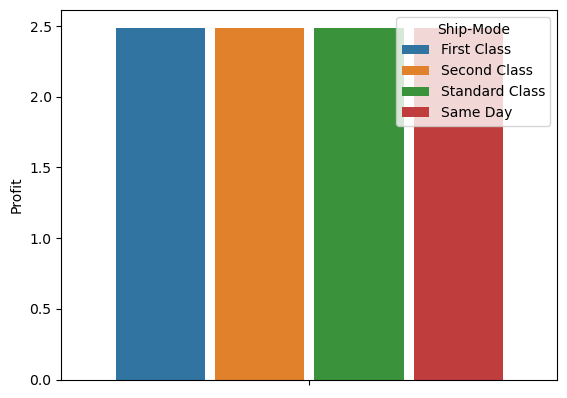

In [12]:
snb.barplot(
    data=wonka, 
    y='Profit',
    hue='Ship-Mode',
    width=0.8, 
    gap=0.1
)

In [13]:
# Ajouter une colonne Ventes au DataFrame
data = {'Sexe': ['Homme', 'Femme', 'Homme', 'Femme', 'Homme', 'Femme'],
        'Âge': ['18-24', '18-24', '25-34', '25-34', '18-24', '45+'],
        'Ventes': [200, 150, 300, 400, 250, 100]}
df = pd.DataFrame(data)

# Création du tableau croisé dynamique
tableau_croise_dynamique = df.pivot_table(values='Ventes', index='Sexe', columns='Âge', aggfunc='sum')
print(tableau_croise_dynamique)


Âge    18-24  25-34    45+
Sexe                      
Femme  150.0  400.0  100.0
Homme  450.0  300.0    NaN
